In [3271]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

from sklearn.metrics import f1_score
from scipy.stats import zscore

from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
!pip install category_encoders
from sklearn.compose import ColumnTransformer

from category_encoders import TargetEncoder


from scipy.stats import skew
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier, ExtraTreesClassifier, BaggingClassifier

In [3272]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3273]:
# train_df['category'] = check_and_impute(train_df, 'category')
# train_df['male_count'] = check_and_impute(train_df, 'male_count')

In [3274]:




# # 2. Inspect unique values to find constant columns
# unique_values = train_df.nunique()
# print("Number of unique values in each column:")
# print(unique_values)

# # You can drop columns with only 1 unique value (constant columns)
# drop_constant = unique_values[unique_values == 1].index.tolist()
# print(f"Constant columns to drop: {drop_constant}")

# # # 3. Data type check: Identify irrelevant columns (e.g., string or object columns)
# # # For this step, we could drop identifiers like 'ID' or other columns not useful for prediction
# # object_columns = train_df.select_dtypes(include=['object']).columns
# # print(f"Columns with non-numeric types (may need encoding or dropping): {object_columns}")

# # 4. Correlation analysis (for numerical columns)
# correlation_matrix = train_df.corr()
# print("Correlation matrix:")
# print(correlation_matrix)

# # # Drop columns with very high correlation (>0.9) as they may be redundant
# # threshold = 0.9
# # high_correlation = set()
# # for i in range(len(correlation_matrix.columns)):
# #     for j in range(i):
# #         if abs(correlation_matrix.iloc[i, j]) > threshold:
# #             colname = correlation_matrix.columns[i]
# #             high_correlation.add(colname)

# # print(f"Highly correlated columns to drop (correlation > {threshold}): {high_correlation}")

# # # Combine all the columns to drop
# # columns_to_drop = set(drop_missing + drop_constant + list(high_correlation))
# # print(f"Final list of columns to drop: {columns_to_drop}")

# # # Drop the identified columns
# # train_df.drop(columns=columns_to_drop, inplace=True)
# # print(f"Dataset after dropping columns: {train_df.shape}")


In [3275]:
null_counts = train_df.isnull().sum()
null_counts1 = test_df.isnull().sum()
null_columns = null_counts[null_counts > 0]
null_columns1 = null_counts1[null_counts1 > 0]

print("Columns with missing values in train:")
print(null_columns)

print("Columns with missing values in test:")
print(null_columns1)

Columns with missing values in train:
visitor_nation                      230
age_bracket                           8
travelling_with                     737
female_count                          2
male_count                            4
key_activity                        128
first_time_visitor                   99
transport_package_international     147
package_accomodation                143
food_package                        171
insurance_package                   236
days_before_booked                 1553
weather_at_arrival                 3403
tour_length                         402
special_requirements               8117
category                             34
dtype: int64
Columns with missing values in test:
visitor_nation                      126
travelling_with                     338
male_count                            2
key_activity                         65
first_time_visitor                   39
transport_package_international      57
package_accomodation            

In [3276]:
train_df.head()
test_df.head()

,trip_ID,visitor_nation,age_bracket,travelling_with,female_count,male_count,key_activity,trip_purpose,first_time_visitor,mainland_nights,...,package_accomodation,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,days_before_booked,weather_at_arrival,tour_length,special_requirements
0,tour_id8gzpck76,CONGO,25-44,Alone,0.0,1.0,Widlife Tourism,Business,No,14,...,No,No,No,No,No,No,15-30,"sunny,",15-30,"wheelchair,"
1,tour_idow1zxkou,SWIZERLAND,45-64,With Spouse,1.0,1.0,Widlife Tourism,Leisure and Holidays,Yes,8,...,Yes,Yes,No,No,Yes,No,61-90,Stormy,1-6,NaN
2,tour_idue7esfqz,MEXICO,45-64,With Other Friends/Relatives,2.0,0.0,Cultural Tourism,Leisure and Holidays,Yes,3,...,Yes,Yes,Yes,Yes,Yes,No,1-7,Stormy,30+,none
3,tour_idnj3mjzpb,JAPAN,25-44,With Other Friends/Relatives,1.0,1.0,Widlife Tourism,Leisure and Holidays,Yes,5,...,Yes,Yes,Yes,Yes,Yes,No,90+,"sunny,",7-14,NaN
4,tour_ida3us5yk2,SPAIN,25-44,With Other Friends/Relatives,2.0,0.0,Wildlife Tourism,Leisure and Holidays,Yes,0,...,Yes,Yes,No,Yes,No,Yes,61-90,Stormy,30+,"dietary needs,"


In [3277]:
train_df.head()

,trip_ID,visitor_nation,age_bracket,travelling_with,female_count,male_count,key_activity,trip_purpose,first_time_visitor,mainland_nights,...,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,days_before_booked,weather_at_arrival,tour_length,special_requirements,category
0,tour_idftaa27vp,FRANCE,45-64,With Spouse and Children,1.0,2.0,Beach Tourism,Leisure and Holidays,Yes,0,...,No,No,No,No,No,NaN,"cloudy,",30+,NaN,1.0
1,tour_iduck75m57,KENYA,45-64,Alone,1.0,0.0,Conference Tourism,Meetings and Conference,Yes,6,...,No,No,No,No,No,15-30,"sunny,",30+,NaN,2.0
2,tour_id8y3w40h8,SOUTH AFRICA,25-44,With Other Friends/Relatives,2.0,0.0,Cultural Tourism,Meetings and Conference,No,4,...,No,No,No,No,No,90+,"sunny,",30+,none,2.0
3,tour_idkoh8mkgr,ITALY,25-44,With Spouse,1.0,1.0,Widlife Tourism,Leisure and Holidays,Yes,0,...,Yes,Yes,Yes,Yes,No,8-14,NaN,NaN,none,0.0
4,tour_idkmsfa00a,ITALY,25-44,With Spouse,1.0,1.0,Beach Tourism,Leisure and Holidays,Yes,0,...,Yes,No,No,No,No,90+,"sunny,",7-14,NaN,0.0


In [3278]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   trip_ID                          12654 non-null  object 
 1   visitor_nation                   12424 non-null  object 
 2   age_bracket                      12646 non-null  object 
 3   travelling_with                  11917 non-null  object 
 4   female_count                     12652 non-null  float64
 5   male_count                       12650 non-null  float64
 6   key_activity                     12526 non-null  object 
 7   trip_purpose                     12654 non-null  object 
 8   first_time_visitor               12555 non-null  object 
 9   mainland_nights                  12654 non-null  int64  
 10  island_nights                    12654 non-null  int64  
 11  tour_arrangement                 12654 non-null  object 
 12  transport_package_

In [3279]:
# Calculate missing values in train and test datasets
null_counts = train_df.isnull().sum()
null_counts1 = test_df.isnull().sum()

# Get the columns with missing values
null_columns = null_counts[null_counts > 0]
null_columns1 = null_counts1[null_counts1 > 0]

# Prepare the data for tabulation
null_columns_table = tabulate(null_columns.items(), headers=['Column', 'Missing Values'], tablefmt='grid')
null_columns1_table = tabulate(null_columns1.items(), headers=['Column', 'Missing Values'], tablefmt='grid')

# Print the results in grid format
print("Columns with missing values in train_df:")
print(null_columns_table)
print("\nColumns with missing values in test_df:")
print(null_columns1_table)


Columns with missing values in train_df:
+---------------------------------+------------------+
| Column                          |   Missing Values |
+=================================+==================+
| visitor_nation                  |              230 |
+---------------------------------+------------------+
| age_bracket                     |                8 |
+---------------------------------+------------------+
| travelling_with                 |              737 |
+---------------------------------+------------------+
| female_count                    |                2 |
+---------------------------------+------------------+
| male_count                      |                4 |
+---------------------------------+------------------+
| key_activity                    |              128 |
+---------------------------------+------------------+
| first_time_visitor              |               99 |
+---------------------------------+------------------+
| transport_package_inte

In [3280]:
# Calculate missing values in train and test datasets
null_counts = train_df.isnull().sum()
null_counts1 = test_df.isnull().sum()

# Get the columns with missing values
null_columns = null_counts[null_counts > 0]
null_columns1 = null_counts1[null_counts1 > 0]

# Prepare the data for tabulation
null_columns_table = tabulate(null_columns.items(), headers=['Column', 'Missing Values'], tablefmt='grid')
null_columns1_table = tabulate(null_columns1.items(), headers=['Column', 'Missing Values'], tablefmt='grid')

# Print the results in grid format
print("Columns with missing values in train_df:")
print(null_columns_table)
print("\nColumns with missing values in test_df:")
print(null_columns1_table)

Columns with missing values in train_df:
+---------------------------------+------------------+
| Column                          |   Missing Values |
+=================================+==================+
| visitor_nation                  |              230 |
+---------------------------------+------------------+
| age_bracket                     |                8 |
+---------------------------------+------------------+
| travelling_with                 |              737 |
+---------------------------------+------------------+
| female_count                    |                2 |
+---------------------------------+------------------+
| male_count                      |                4 |
+---------------------------------+------------------+
| key_activity                    |              128 |
+---------------------------------+------------------+
| first_time_visitor              |               99 |
+---------------------------------+------------------+
| transport_package_inte

In [3281]:
train_df.head()

,trip_ID,visitor_nation,age_bracket,travelling_with,female_count,male_count,key_activity,trip_purpose,first_time_visitor,mainland_nights,...,food_package,transport_package_mx,sightseeing_package,guided_tour_package,insurance_package,days_before_booked,weather_at_arrival,tour_length,special_requirements,category
0,tour_idftaa27vp,FRANCE,45-64,With Spouse and Children,1.0,2.0,Beach Tourism,Leisure and Holidays,Yes,0,...,No,No,No,No,No,NaN,"cloudy,",30+,NaN,1.0
1,tour_iduck75m57,KENYA,45-64,Alone,1.0,0.0,Conference Tourism,Meetings and Conference,Yes,6,...,No,No,No,No,No,15-30,"sunny,",30+,NaN,2.0
2,tour_id8y3w40h8,SOUTH AFRICA,25-44,With Other Friends/Relatives,2.0,0.0,Cultural Tourism,Meetings and Conference,No,4,...,No,No,No,No,No,90+,"sunny,",30+,none,2.0
3,tour_idkoh8mkgr,ITALY,25-44,With Spouse,1.0,1.0,Widlife Tourism,Leisure and Holidays,Yes,0,...,Yes,Yes,Yes,Yes,No,8-14,NaN,NaN,none,0.0
4,tour_idkmsfa00a,ITALY,25-44,With Spouse,1.0,1.0,Beach Tourism,Leisure and Holidays,Yes,0,...,Yes,No,No,No,No,90+,"sunny,",7-14,NaN,0.0


In [3282]:
# Describe only the categorical columns (object type)
categorical_description = train_df.select_dtypes(include=['object']).describe(include='all')

# Transpose to display vertically
categorical_description_transposed = categorical_description.transpose()

# Apply styling to make it look like a grid (Jupyter Notebooks display)
categorical_description_transposed.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%
])

,count,unique,top,freq
trip_ID,12654,12654,tour_idftaa27vp,1
visitor_nation,12424,123,UNITED STATES OF AMERICA,1953
age_bracket,12646,5,25-44,6146
travelling_with,11917,5,Alone,5088
key_activity,12526,10,Widlife Tourism,4096
trip_purpose,12654,8,Leisure and Holidays,8207
first_time_visitor,12555,2,Yes,8762
tour_arrangement,12654,2,Package Tour,6501
transport_package_international,12507,2,No,8183
source_of_info,12654,8,"Travel agent, tour operator",5572


In [3283]:
# Describe only the categorical columns (object type)
categorical_description_test = test_df.select_dtypes(include=['object']).describe(include='all')

# Transpose to display vertically
categorical_description_test_transposed = categorical_description_test.transpose()

# Apply styling to make it look like a grid (Jupyter Notebooks display)
categorical_description_test_transposed.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%
])

,count,unique,top,freq
trip_ID,5852,5852,tour_id8gzpck76,1
visitor_nation,5726,117,UNITED STATES OF AMERICA,835
age_bracket,5852,5,25-44,2896
travelling_with,5514,5,Alone,2502
key_activity,5787,10,Widlife Tourism,1834
trip_purpose,5852,8,Leisure and Holidays,3548
first_time_visitor,5813,2,Yes,3876
tour_arrangement,5852,2,Independent,3058
transport_package_international,5795,2,No,3917
source_of_info,5852,8,"Travel agent, tour operator",2433


In [3284]:
# Describe only the categorical columns (object type)
float_description_test = test_df.select_dtypes(include=['int64']).describe(include='all')

# Transpose to display vertically
float_description_test_transposed = float_description_test.transpose()

# Apply styling to make it look like a grid (Jupyter Notebooks display)
float_description_test_transposed.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%
])


,count,mean,std,min,25%,50%,75%,max
mainland_nights,5852.000000,9.004272,13.171125,0.000000,3.000000,6.000000,10.000000,300.000000
island_nights,5852.000000,2.443096,5.571739,0.000000,0.000000,0.000000,4.000000,120.000000


In [3285]:
# Describe only the categorical columns (object type)
float_description = train_df.select_dtypes(include=['float64']).describe(include='all')

# Transpose to display vertically
float_description_transposed = float_description.transpose()

# Apply styling to make it look like a grid (Jupyter Notebooks display)
float_description_transposed.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%
])

,count,mean,std,min,25%,50%,75%,max
female_count,12652.000000,0.943724,1.268167,0.000000,0.000000,1.000000,1.000000,49.000000
male_count,12650.000000,1.009407,1.234850,0.000000,1.000000,1.000000,1.000000,58.000000
category,12620.000000,0.621157,0.683645,0.000000,0.000000,1.000000,1.000000,2.000000


In [3286]:
# Identify columns in train_df with only 'Yes' or 'No'
yes_no_columns = []

for col in train_df.columns:
    unique_values = train_df[col].dropna().unique()  # Drop NaN values and get unique values
    if set(unique_values) == {'Yes', 'No'}:         # Check if unique values are exactly {'Yes', 'No'}
        yes_no_columns.append(col)

print("Columns with 'Yes' or 'No' in train_df:", yes_no_columns)
# Identify columns in train_df with only 'Yes' or 'No'
# yes_no_columns = []

# for col in train_df.columns:
#     unique_values = train_df[col].dropna().unique()  # Drop NaN values and get unique values
#     if set(unique_values) == {'Yes', 'No'}:         # Check if unique values are exactly {'Yes', 'No'}
#         yes_no_columns.append(col)

# print("Columns with 'Yes' or 'No' in train_df:", yes_no_columns)

# # Apply One-Hot Encoding for 'Yes'/'No' columns without dropping any category
# train_df = pd.get_dummies(train_df, columns=yes_no_columns)
# test_df = pd.get_dummies(test_df, columns=yes_no_columns)




Columns with 'Yes' or 'No' in train_df: ['first_time_visitor', 'transport_package_international', 'package_accomodation', 'food_package', 'transport_package_mx', 'sightseeing_package', 'guided_tour_package', 'insurance_package']


In [3287]:
# Preprocess 'Yes/No' columns by mapping 'Yes' to 1 and 'No' to 0
for col in yes_no_columns:
    # Map 'Yes' to 1 and 'No' to 0
    train_df[col] = train_df[col].map({'Yes': 1, 'No': 0})
    test_df[col] = test_df[col].map({'Yes': 1, 'No': 0})

    # train_df['col'] = check_and_impute(train_df, 'col')
    # Fill missing values with the most frequent value (mode)
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)

print("Preprocessing complete for 'Yes/No' columns with mode filling.")


Preprocessing complete for 'Yes/No' columns with mode filling.


<ipython-input-3287-618b035e4b32>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)
<ipython-input-3287-618b035e4b32>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [3288]:
# Describe only the categorical columns (object type)
float_description = train_df.select_dtypes(include=['float64']).describe(include='all')

# Transpose to display vertically
float_description_transposed = float_description.transpose()

# Apply styling to make it look like a grid (Jupyter Notebooks display)
float_description_transposed.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%
])

,count,mean,std,min,25%,50%,75%,max
female_count,12652.000000,0.943724,1.268167,0.000000,0.000000,1.000000,1.000000,49.000000
male_count,12650.000000,1.009407,1.234850,0.000000,1.000000,1.000000,1.000000,58.000000
first_time_visitor,12654.000000,0.700253,0.458165,0.000000,0.000000,1.000000,1.000000,1.000000
transport_package_international,12654.000000,0.341710,0.474302,0.000000,0.000000,0.000000,1.000000,1.000000
package_accomodation,12654.000000,0.489885,0.499917,0.000000,0.000000,0.000000,1.000000,1.000000
food_package,12654.000000,0.456615,0.498134,0.000000,0.000000,0.000000,1.000000,1.000000
insurance_package,12654.000000,0.146357,0.353478,0.000000,0.000000,0.000000,0.000000,1.000000
category,12620.000000,0.621157,0.683645,0.000000,0.000000,1.000000,1.000000,2.000000


In [3289]:
print("Unique visitor_nation in train_df:", train_df['visitor_nation'].unique())
print("Unique visitor_nation in test_df:", test_df['visitor_nation'].unique())

Unique visitor_nation in train_df: ['FRANCE' 'KENYA' 'SOUTH AFRICA' 'ITALY' 'ZIMBABWE' 'INDIA' 'AUSTRIA'
 'UNITED STATES OF AMERICA' 'GERMANY' 'UNITED KINGDOM' 'SWEDEN' 'SPAIN'
 'ZAMBIA' 'CANADA' 'DENMARK' 'CONGO' 'ISRAEL' 'SWIZERLAND' 'CHINA'
 'BURUNDI' 'AUSTRALIA' 'NETHERLANDS' 'KOREA' 'BELGIUM' 'IRELAND' 'RUSSIA'
 'UGANDA' 'PHILIPINES' 'NORWAY' 'RWANDA' 'UAE' 'LUXEMBOURG' 'OMAN'
 'CROATIA' 'SLOVAKIA' 'TRINIDAD TOBACCO' 'MORROCO' 'MALAWI' 'SUDAN'
 'BERMUDA' 'VENEZUELA' 'ETHIOPIA' 'MALT' 'TAIWAN' nan 'PAKISTAN'
 'MALAYSIA' 'POLAND' 'BRAZIL' 'NEW ZEALAND' 'LEBANON' 'MOZAMBIQUE'
 'SINGAPORE' 'PORTUGAL' 'JAPAN' 'QATAR' 'SERBIA' 'BURGARIA' 'DRC' 'EGYPT'
 'TURKEY' 'CZECH REPUBLIC' 'KUWAIT' 'FINLAND' 'ARGENTINA' 'COMORO'
 'MADAGASCAR' 'MAURITIUS' 'GREECE' 'UKRAIN' 'NEPAL' 'VIETNAM' 'INDONESIA'
 'UNITED ARAB EMIRATES' 'NIGERIA' 'COSTARICA' 'SRI LANKA' 'SCOTLAND'
 'SAUD ARABIA' 'BAHRAIN' 'MONECASQUE' 'SWAZILAND' 'NAMIBIA' 'LATVIA'
 'CYPRUS' 'COLOMBIA' 'MEXICO' 'JAMAICA' 'SLOVENIA' 'URUGUAY' '

In [3290]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder with handle_unknown='ignore' to deal with unseen categories
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the combined 'visitor_nation' from both train and test datasets
combined_nations = pd.concat([train_df[['visitor_nation']], test_df[['visitor_nation']]])

# Apply one-hot encoding to the combined data
visitor_nation_encoded_combined = ohe.fit_transform(combined_nations)

# Split the combined encoded data back into train and test
visitor_nation_encoded_train = visitor_nation_encoded_combined[:len(train_df), :]
visitor_nation_encoded_test = visitor_nation_encoded_combined[len(train_df):, :]

# Convert the one-hot encoded arrays into DataFrames for easy concatenation
visitor_nation_encoded_train_df = pd.DataFrame(visitor_nation_encoded_train, columns=ohe.get_feature_names_out(['visitor_nation']))
visitor_nation_encoded_test_df = pd.DataFrame(visitor_nation_encoded_test, columns=ohe.get_feature_names_out(['visitor_nation']))

# Concatenate the encoded visitor_nation columns to the original DataFrames
train_df = pd.concat([train_df.reset_index(drop=True), visitor_nation_encoded_train_df.reset_index(drop=True)], axis=1).drop(columns=['visitor_nation'])
test_df = pd.concat([test_df.reset_index(drop=True), visitor_nation_encoded_test_df.reset_index(drop=True)], axis=1).drop(columns=['visitor_nation'])




In [3291]:
train_df.head()

,trip_ID,age_bracket,travelling_with,female_count,male_count,key_activity,trip_purpose,first_time_visitor,mainland_nights,island_nights,...,visitor_nation_UNITED ARAB EMIRATES,visitor_nation_UNITED KINGDOM,visitor_nation_UNITED STATES OF AMERICA,visitor_nation_URUGUAY,visitor_nation_VENEZUELA,visitor_nation_VIETNAM,visitor_nation_YEMEN,visitor_nation_ZAMBIA,visitor_nation_ZIMBABWE,visitor_nation_nan
0,tour_idftaa27vp,45-64,With Spouse and Children,1.0,2.0,Beach Tourism,Leisure and Holidays,1.0,0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tour_iduck75m57,45-64,Alone,1.0,0.0,Conference Tourism,Meetings and Conference,1.0,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tour_id8y3w40h8,25-44,With Other Friends/Relatives,2.0,0.0,Cultural Tourism,Meetings and Conference,0.0,4,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tour_idkoh8mkgr,25-44,With Spouse,1.0,1.0,Widlife Tourism,Leisure and Holidays,1.0,0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tour_idkmsfa00a,25-44,With Spouse,1.0,1.0,Beach Tourism,Leisure and Holidays,1.0,0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3292]:
test_df.head()

,trip_ID,age_bracket,travelling_with,female_count,male_count,key_activity,trip_purpose,first_time_visitor,mainland_nights,island_nights,...,visitor_nation_UNITED ARAB EMIRATES,visitor_nation_UNITED KINGDOM,visitor_nation_UNITED STATES OF AMERICA,visitor_nation_URUGUAY,visitor_nation_VENEZUELA,visitor_nation_VIETNAM,visitor_nation_YEMEN,visitor_nation_ZAMBIA,visitor_nation_ZIMBABWE,visitor_nation_nan
0,tour_id8gzpck76,25-44,Alone,0.0,1.0,Widlife Tourism,Business,0.0,14,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tour_idow1zxkou,45-64,With Spouse,1.0,1.0,Widlife Tourism,Leisure and Holidays,1.0,8,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tour_idue7esfqz,45-64,With Other Friends/Relatives,2.0,0.0,Cultural Tourism,Leisure and Holidays,1.0,3,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tour_idnj3mjzpb,25-44,With Other Friends/Relatives,1.0,1.0,Widlife Tourism,Leisure and Holidays,1.0,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tour_ida3us5yk2,25-44,With Other Friends/Relatives,2.0,0.0,Wildlife Tourism,Leisure and Holidays,1.0,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3293]:
# Describe only the categorical columns (object type)
categorical_description = train_df.select_dtypes(include=['object']).describe(include='all')

# Transpose to display vertically
categorical_description_transposed = categorical_description.transpose()

# Apply styling to make it look like a grid (Jupyter Notebooks display)
categorical_description_transposed.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%
])

,count,unique,top,freq
trip_ID,12654,12654,tour_idftaa27vp,1
age_bracket,12646,5,25-44,6146
travelling_with,11917,5,Alone,5088
key_activity,12526,10,Widlife Tourism,4096
trip_purpose,12654,8,Leisure and Holidays,8207
tour_arrangement,12654,2,Package Tour,6501
source_of_info,12654,8,"Travel agent, tour operator",5572
days_before_booked,11101,6,61-90,4216
weather_at_arrival,9251,7,"sunny,",3175
tour_length,12252,4,7-14,4244


In [3294]:
# Describe only the categorical columns (object type)
float_description = train_df.select_dtypes(include=['float64']).describe(include='all')

# Transpose to display vertically
float_description_transposed = float_description.transpose()

# Apply styling to make it look like a grid (Jupyter Notebooks display)
float_description_transposed.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%
])

,count,mean,std,min,25%,50%,75%,max
female_count,12652.000000,0.943724,1.268167,0.000000,0.000000,1.000000,1.000000,49.000000
male_count,12650.000000,1.009407,1.234850,0.000000,1.000000,1.000000,1.000000,58.000000
first_time_visitor,12654.000000,0.700253,0.458165,0.000000,0.000000,1.000000,1.000000,1.000000
transport_package_international,12654.000000,0.341710,0.474302,0.000000,0.000000,0.000000,1.000000,1.000000
package_accomodation,12654.000000,0.489885,0.499917,0.000000,0.000000,0.000000,1.000000,1.000000
food_package,12654.000000,0.456615,0.498134,0.000000,0.000000,0.000000,1.000000,1.000000
insurance_package,12654.000000,0.146357,0.353478,0.000000,0.000000,0.000000,0.000000,1.000000
category,12620.000000,0.621157,0.683645,0.000000,0.000000,1.000000,1.000000,2.000000
visitor_nation_AFGHANISTAN,12654.000000,0.000079,0.008890,0.000000,0.000000,0.000000,0.000000,1.000000
visitor_nation_ALGERIA,12654.000000,0.000237,0.015396,0.000000,0.000000,0.000000,0.000000,1.000000


In [3295]:
train_df.head()

,trip_ID,age_bracket,travelling_with,female_count,male_count,key_activity,trip_purpose,first_time_visitor,mainland_nights,island_nights,...,visitor_nation_UNITED ARAB EMIRATES,visitor_nation_UNITED KINGDOM,visitor_nation_UNITED STATES OF AMERICA,visitor_nation_URUGUAY,visitor_nation_VENEZUELA,visitor_nation_VIETNAM,visitor_nation_YEMEN,visitor_nation_ZAMBIA,visitor_nation_ZIMBABWE,visitor_nation_nan
0,tour_idftaa27vp,45-64,With Spouse and Children,1.0,2.0,Beach Tourism,Leisure and Holidays,1.0,0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tour_iduck75m57,45-64,Alone,1.0,0.0,Conference Tourism,Meetings and Conference,1.0,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tour_id8y3w40h8,25-44,With Other Friends/Relatives,2.0,0.0,Cultural Tourism,Meetings and Conference,0.0,4,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tour_idkoh8mkgr,25-44,With Spouse,1.0,1.0,Widlife Tourism,Leisure and Holidays,1.0,0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tour_idkmsfa00a,25-44,With Spouse,1.0,1.0,Beach Tourism,Leisure and Holidays,1.0,0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3296]:
test_df.head()

,trip_ID,age_bracket,travelling_with,female_count,male_count,key_activity,trip_purpose,first_time_visitor,mainland_nights,island_nights,...,visitor_nation_UNITED ARAB EMIRATES,visitor_nation_UNITED KINGDOM,visitor_nation_UNITED STATES OF AMERICA,visitor_nation_URUGUAY,visitor_nation_VENEZUELA,visitor_nation_VIETNAM,visitor_nation_YEMEN,visitor_nation_ZAMBIA,visitor_nation_ZIMBABWE,visitor_nation_nan
0,tour_id8gzpck76,25-44,Alone,0.0,1.0,Widlife Tourism,Business,0.0,14,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tour_idow1zxkou,45-64,With Spouse,1.0,1.0,Widlife Tourism,Leisure and Holidays,1.0,8,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tour_idue7esfqz,45-64,With Other Friends/Relatives,2.0,0.0,Cultural Tourism,Leisure and Holidays,1.0,3,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tour_idnj3mjzpb,25-44,With Other Friends/Relatives,1.0,1.0,Widlife Tourism,Leisure and Holidays,1.0,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tour_ida3us5yk2,25-44,With Other Friends/Relatives,2.0,0.0,Wildlife Tourism,Leisure and Holidays,1.0,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3297]:
# Fill missing values in 'category' column with median (assuming it's a numerical column)
train_df['category'] = train_df['category'].fillna(train_df['category'].mode())

In [3298]:
# Describe only the categorical columns (object type)
categorical_description = train_df.select_dtypes(include=['float64']).describe(include='all')

# Transpose to display vertically
categorical_description_transposed = categorical_description.transpose()

# Apply styling to make it look like a grid (Jupyter Notebooks display)
categorical_description_transposed.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%
])

,count,mean,std,min,25%,50%,75%,max
female_count,12652.000000,0.943724,1.268167,0.000000,0.000000,1.000000,1.000000,49.000000
male_count,12650.000000,1.009407,1.234850,0.000000,1.000000,1.000000,1.000000,58.000000
first_time_visitor,12654.000000,0.700253,0.458165,0.000000,0.000000,1.000000,1.000000,1.000000
transport_package_international,12654.000000,0.341710,0.474302,0.000000,0.000000,0.000000,1.000000,1.000000
package_accomodation,12654.000000,0.489885,0.499917,0.000000,0.000000,0.000000,1.000000,1.000000
food_package,12654.000000,0.456615,0.498134,0.000000,0.000000,0.000000,1.000000,1.000000
insurance_package,12654.000000,0.146357,0.353478,0.000000,0.000000,0.000000,0.000000,1.000000
category,12620.000000,0.621157,0.683645,0.000000,0.000000,1.000000,1.000000,2.000000
visitor_nation_AFGHANISTAN,12654.000000,0.000079,0.008890,0.000000,0.000000,0.000000,0.000000,1.000000
visitor_nation_ALGERIA,12654.000000,0.000237,0.015396,0.000000,0.000000,0.000000,0.000000,1.000000


In [3299]:
# Check unique values in the original age_bracket column
print("Unique days_before_booked in train_df:", train_df['days_before_booked'].unique())
print("Unique days_before_booked in test_df:", test_df['days_before_booked'].unique())

Unique days_before_booked in train_df: [nan '15-30 ' '90+' '8-14' '61-90' '31-60' '1-7 ']
Unique days_before_booked in test_df: ['15-30 ' '61-90' '1-7 ' '90+' '31-60' '8-14' nan]


In [3300]:
# Define the mapping for days_before_booked ranges to numerical midpoints
days_before_booked_mapping = {
    '1-7 ': 4,       # Midpoint for 1-7 days (extra space is included as per data format)
    '8-14': 11,      # Midpoint for 8-14 days
    '15-30 ': 22.5,  # Midpoint for 15-30 days (extra space is included as per data format)
    '31-60': 45.5,   # Midpoint for 31-60 days
    '61-90': 75.5,   # Midpoint for 61-90 days
    '90+': 95        # Representative value for more than 90 days
}

# Map days_before_booked in train_df and test_df to numerical values
train_df['days_before_booked'] = train_df['days_before_booked'].map(days_before_booked_mapping)
test_df['days_before_booked'] = test_df['days_before_booked'].map(days_before_booked_mapping)

# Calculate the mean of days_before_booked in train_df, ignoring NaNs
days_before_booked_mean = train_df['days_before_booked'].mean()

# Fill missing values in days_before_booked with the calculated mean
train_df['days_before_booked'].fillna(days_before_booked_mean, inplace=True)
test_df['days_before_booked'].fillna(days_before_booked_mean, inplace=True)

# Ensure the column is numerical
train_df['days_before_booked'] = train_df['days_before_booked'].astype(float)
test_df['days_before_booked'] = test_df['days_before_booked'].astype(float)

# Verify the results
print("Unique values in train_df['days_before_booked'] after processing:", train_df['days_before_booked'].unique())
print("Unique values in test_df['days_before_booked'] after processing:", test_df['days_before_booked'].unique())


Unique values in train_df['days_before_booked'] after processing: [69.25060805 22.5        95.         11.         75.5        45.5
  4.        ]
Unique values in test_df['days_before_booked'] after processing: [22.5        75.5         4.         95.         45.5        11.
 69.25060805]


<ipython-input-3300-646a85c8b928>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['days_before_booked'].fillna(days_before_booked_mean, inplace=True)
<ipython-input-3300-646a85c8b928>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [3301]:
# Check unique values in the original age_bracket column
print("Unique days_before_booked in train_df:", train_df['days_before_booked'].unique())
print("Unique days_before_booked in test_df:", test_df['days_before_booked'].unique())

Unique days_before_booked in train_df: [69.25060805 22.5        95.         11.         75.5        45.5
  4.        ]
Unique days_before_booked in test_df: [22.5        75.5         4.         95.         45.5        11.
 69.25060805]


In [3302]:
# Describe only the categorical columns (object type)
categorical_description = train_df.select_dtypes(include=['object']).describe(include='all')

# Transpose to display vertically
categorical_description_transposed = categorical_description.transpose()

# Apply styling to make it look like a grid (Jupyter Notebooks display)
categorical_description_transposed.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%
])

,count,unique,top,freq
trip_ID,12654,12654,tour_idftaa27vp,1
age_bracket,12646,5,25-44,6146
travelling_with,11917,5,Alone,5088
key_activity,12526,10,Widlife Tourism,4096
trip_purpose,12654,8,Leisure and Holidays,8207
tour_arrangement,12654,2,Package Tour,6501
source_of_info,12654,8,"Travel agent, tour operator",5572
weather_at_arrival,9251,7,"sunny,",3175
tour_length,12252,4,7-14,4244
special_requirements,4537,4,none,2964


In [3303]:
# Describe only the categorical columns (object type)
float_description = train_df.select_dtypes(include=['float64']).describe(include='all')

# Transpose to display vertically
float_description_transposed = float_description.transpose()

# Apply styling to make it look like a grid (Jupyter Notebooks display)
float_description_transposed.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%
])

,count,mean,std,min,25%,50%,75%,max
female_count,12652.000000,0.943724,1.268167,0.000000,0.000000,1.000000,1.000000,49.000000
male_count,12650.000000,1.009407,1.234850,0.000000,1.000000,1.000000,1.000000,58.000000
first_time_visitor,12654.000000,0.700253,0.458165,0.000000,0.000000,1.000000,1.000000,1.000000
transport_package_international,12654.000000,0.341710,0.474302,0.000000,0.000000,0.000000,1.000000,1.000000
package_accomodation,12654.000000,0.489885,0.499917,0.000000,0.000000,0.000000,1.000000,1.000000
food_package,12654.000000,0.456615,0.498134,0.000000,0.000000,0.000000,1.000000,1.000000
insurance_package,12654.000000,0.146357,0.353478,0.000000,0.000000,0.000000,0.000000,1.000000
days_before_booked,12654.000000,69.250608,25.192293,4.000000,45.500000,75.500000,95.000000,95.000000
category,12620.000000,0.621157,0.683645,0.000000,0.000000,1.000000,1.000000,2.000000
visitor_nation_AFGHANISTAN,12654.000000,0.000079,0.008890,0.000000,0.000000,0.000000,0.000000,1.000000


In [3304]:
# Check unique values in the original age_bracket column
print("Unique age brackets in train_df:", train_df['age_bracket'].unique())
print("Unique age brackets in test_df:", test_df['age_bracket'].unique())

Unique age brackets in train_df: ['45-64' '25-44' '18-24' '65+' nan '<18']
Unique age brackets in test_df: ['25-44' '45-64' '65+' '18-24' '<18']


In [3305]:
# Define the mapping for age ranges to numerical midpoints
age_bracket_mapping = {
    '18-24': 21,   # Midpoint for 18-24
    '25-44': 34.5, # Midpoint for 25-44
    '45-64': 54.5, # Midpoint for 45-64
    '65+': 70,     # Representative value for 65+
    '<18': 16      # Representative value for under 18
}

# Map age_bracket in train_df and test_df to numerical values
train_df['age_bracket'] = train_df['age_bracket'].map(age_bracket_mapping)
test_df['age_bracket'] = test_df['age_bracket'].map(age_bracket_mapping)

# Calculate the mean of age_bracket in train_df, ignoring NaNs
age_bracket_mean = train_df['age_bracket'].median()

# Fill missing values in age_bracket with the calculated mean
train_df['age_bracket'].fillna(age_bracket_mean, inplace=True)
test_df['age_bracket'].fillna(age_bracket_mean, inplace=True)

# Ensure the column is numerical
train_df['age_bracket'] = train_df['age_bracket'].astype(float)
test_df['age_bracket'] = test_df['age_bracket'].astype(float)

# Verify the results
print("Unique values in train_df['age_bracket'] after processing:", train_df['age_bracket'].unique())
print("Unique values in test_df['age_bracket'] after processing:", test_df['age_bracket'].unique())


Unique values in train_df['age_bracket'] after processing: [54.5 34.5 21.  70.  16. ]
Unique values in test_df['age_bracket'] after processing: [34.5 54.5 70.  21.  16. ]


<ipython-input-3305-ab66880580f9>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['age_bracket'].fillna(age_bracket_mean, inplace=True)
<ipython-input-3305-ab66880580f9>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [3306]:
# Describe only the categorical columns (object type)
categorical_description = train_df.select_dtypes(include=['object']).describe(include='all')

# Transpose to display vertically
categorical_description_transposed = categorical_description.transpose()

# Apply styling to make it look like a grid (Jupyter Notebooks display)
categorical_description_transposed.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%
])

,count,unique,top,freq
trip_ID,12654,12654,tour_idftaa27vp,1
travelling_with,11917,5,Alone,5088
key_activity,12526,10,Widlife Tourism,4096
trip_purpose,12654,8,Leisure and Holidays,8207
tour_arrangement,12654,2,Package Tour,6501
source_of_info,12654,8,"Travel agent, tour operator",5572
weather_at_arrival,9251,7,"sunny,",3175
tour_length,12252,4,7-14,4244
special_requirements,4537,4,none,2964


In [3307]:
# Check unique values in the original age_bracket column
print("Unique age brackets in train_df:", train_df['age_bracket'].unique())
print("Unique age brackets in test_df:", test_df['age_bracket'].unique())

Unique age brackets in train_df: [54.5 34.5 21.  70.  16. ]
Unique age brackets in test_df: [34.5 54.5 70.  21.  16. ]


In [3308]:
# Describe only the categorical columns (object type)
float_description = train_df.select_dtypes(include=['float64']).describe(include='all')

# Transpose to display vertically
float_description_transposed = float_description.transpose()

# Apply styling to make it look like a grid (Jupyter Notebooks display)
float_description_transposed.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%
])

,count,mean,std,min,25%,50%,75%,max
age_bracket,12654.000000,41.791252,13.959431,16.000000,34.500000,34.500000,54.500000,70.000000
female_count,12652.000000,0.943724,1.268167,0.000000,0.000000,1.000000,1.000000,49.000000
male_count,12650.000000,1.009407,1.234850,0.000000,1.000000,1.000000,1.000000,58.000000
first_time_visitor,12654.000000,0.700253,0.458165,0.000000,0.000000,1.000000,1.000000,1.000000
transport_package_international,12654.000000,0.341710,0.474302,0.000000,0.000000,0.000000,1.000000,1.000000
package_accomodation,12654.000000,0.489885,0.499917,0.000000,0.000000,0.000000,1.000000,1.000000
food_package,12654.000000,0.456615,0.498134,0.000000,0.000000,0.000000,1.000000,1.000000
insurance_package,12654.000000,0.146357,0.353478,0.000000,0.000000,0.000000,0.000000,1.000000
days_before_booked,12654.000000,69.250608,25.192293,4.000000,45.500000,75.500000,95.000000,95.000000
category,12620.000000,0.621157,0.683645,0.000000,0.000000,1.000000,1.000000,2.000000


In [3309]:
# Check unique values in the original age_bracket column
print("Unique tour_length in train_df:", train_df['tour_length'].unique())
print("Unique tour_length in test_df:", test_df['tour_length'].unique())

Unique tour_length in train_df: ['30+' nan '7-14' '1-6' '15-30']
Unique tour_length in test_df: ['15-30' '1-6' '30+' '7-14' nan]


In [3310]:
# Define the mapping for tour_length ranges to numerical midpoints
tour_length_mapping = {
    '1-6': 3.5,    # Midpoint for 1-6 days
    '7-14': 10.5,  # Midpoint for 7-14 days
    '15-30': 22.5, # Midpoint for 15-30 days
    '30+': 35      # Representative value for more than 30 days
}

# Map tour_length in train_df and test_df to numerical values
train_df['tour_length'] = train_df['tour_length'].map(tour_length_mapping)
test_df['tour_length'] = test_df['tour_length'].map(tour_length_mapping)

# Calculate the mean of tour_length in train_df, ignoring NaNs
tour_length_mean = train_df['tour_length'].mean()

# Fill missing values in tour_length with the calculated mean
train_df['tour_length'].fillna(tour_length_mean, inplace=True)
test_df['tour_length'].fillna(tour_length_mean, inplace=True)

# Ensure the column is numerical
train_df['tour_length'] = train_df['tour_length'].astype(float)
test_df['tour_length'] = test_df['tour_length'].astype(float)

# Verify the results
print("Unique values in train_df['tour_length'] after processing:", train_df['tour_length'].unique())
print("Unique values in test_df['tour_length'] after processing:", test_df['tour_length'].unique())


Unique values in train_df['tour_length'] after processing: [35.         18.51726249 10.5         3.5        22.5       ]
Unique values in test_df['tour_length'] after processing: [22.5         3.5        35.         10.5        18.51726249]


<ipython-input-3310-d8d8248397ac>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['tour_length'].fillna(tour_length_mean, inplace=True)
<ipython-input-3310-d8d8248397ac>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [3311]:
# Check unique values in the original age_bracket column
print("Unique tour_length in train_df:", train_df['tour_length'].unique())
print("Unique tour_length in test_df:", test_df['tour_length'].unique())

Unique tour_length in train_df: [35.         18.51726249 10.5         3.5        22.5       ]
Unique tour_length in test_df: [22.5         3.5        35.         10.5        18.51726249]


In [3312]:
# Describe only the categorical columns (object type)
float_description = train_df.select_dtypes(include=['float64']).describe(include='all')

# Transpose to display vertically
float_description_transposed = float_description.transpose()

# Apply styling to make it look like a grid (Jupyter Notebooks display)
float_description_transposed.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%
])

,count,mean,std,min,25%,50%,75%,max
age_bracket,12654.000000,41.791252,13.959431,16.000000,34.500000,34.500000,54.500000,70.000000
female_count,12652.000000,0.943724,1.268167,0.000000,0.000000,1.000000,1.000000,49.000000
male_count,12650.000000,1.009407,1.234850,0.000000,1.000000,1.000000,1.000000,58.000000
first_time_visitor,12654.000000,0.700253,0.458165,0.000000,0.000000,1.000000,1.000000,1.000000
transport_package_international,12654.000000,0.341710,0.474302,0.000000,0.000000,0.000000,1.000000,1.000000
package_accomodation,12654.000000,0.489885,0.499917,0.000000,0.000000,0.000000,1.000000,1.000000
food_package,12654.000000,0.456615,0.498134,0.000000,0.000000,0.000000,1.000000,1.000000
insurance_package,12654.000000,0.146357,0.353478,0.000000,0.000000,0.000000,0.000000,1.000000
days_before_booked,12654.000000,69.250608,25.192293,4.000000,45.500000,75.500000,95.000000,95.000000
tour_length,12654.000000,18.517262,12.569062,3.500000,10.500000,10.500000,35.000000,35.000000


In [3313]:
# Describe only the categorical columns (object type)
categorical_description = train_df.select_dtypes(include=['object']).describe(include='all')

# Transpose to display vertically
categorical_description_transposed = categorical_description.transpose()

# Apply styling to make it look like a grid (Jupyter Notebooks display)
categorical_description_transposed.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%
])

,count,unique,top,freq
trip_ID,12654,12654,tour_idftaa27vp,1
travelling_with,11917,5,Alone,5088
key_activity,12526,10,Widlife Tourism,4096
trip_purpose,12654,8,Leisure and Holidays,8207
tour_arrangement,12654,2,Package Tour,6501
source_of_info,12654,8,"Travel agent, tour operator",5572
weather_at_arrival,9251,7,"sunny,",3175
special_requirements,4537,4,none,2964


In [3314]:
print("Unique  tour_arrangement in train ", train_df['tour_arrangement'].unique())
print("Unique  tour_arrangement in test ", test_df['tour_arrangement'].unique())

Unique  tour_arrangement in train  ['Independent' 'Package Tour']
Unique  tour_arrangement in test  ['Independent' 'Package Tour']


In [3315]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize the LabelEncoder
# # le = LabelEncoder()

# # # Label encode the 'tour_arrangement' column in both train and test dataframes
# # train_df['tour_arrangement'] = le.fit_transform(train_df['tour_arrangement'])
# # test_df['tour_arrangement'] = le.transform(test_df['tour_arrangement'])  # Use transform here for test data

# # Define the ordinal mapping for 'tour_arrangement'
# ordinal_mapping = {
#     'Independent': 0,  # Assign lower rank to 'Independent'
#     'Package Tour': 1  # Assign higher rank to 'Package Tour'
# }

# # Apply ordinal encoding to both train and test datasets
# train_df['tour_arrangement'] = train_df['tour_arrangement'].map(ordinal_mapping)
# test_df['tour_arrangement'] = test_df['tour_arrangement'].map(ordinal_mapping)


In [3316]:
print("Unique  tour_arrangement in train after processing:", train_df['tour_arrangement'].unique())
print("Unique  tour_arrangement in test after processing:", test_df['tour_arrangement'].unique())

Unique  tour_arrangement in train after processing: ['Independent' 'Package Tour']
Unique  tour_arrangement in test after processing: ['Independent' 'Package Tour']


In [3317]:
train_df.head()

,trip_ID,age_bracket,travelling_with,female_count,male_count,key_activity,trip_purpose,first_time_visitor,mainland_nights,island_nights,...,visitor_nation_UNITED ARAB EMIRATES,visitor_nation_UNITED KINGDOM,visitor_nation_UNITED STATES OF AMERICA,visitor_nation_URUGUAY,visitor_nation_VENEZUELA,visitor_nation_VIETNAM,visitor_nation_YEMEN,visitor_nation_ZAMBIA,visitor_nation_ZIMBABWE,visitor_nation_nan
0,tour_idftaa27vp,54.5,With Spouse and Children,1.0,2.0,Beach Tourism,Leisure and Holidays,1.0,0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tour_iduck75m57,54.5,Alone,1.0,0.0,Conference Tourism,Meetings and Conference,1.0,6,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tour_id8y3w40h8,34.5,With Other Friends/Relatives,2.0,0.0,Cultural Tourism,Meetings and Conference,0.0,4,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tour_idkoh8mkgr,34.5,With Spouse,1.0,1.0,Widlife Tourism,Leisure and Holidays,1.0,0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tour_idkmsfa00a,34.5,With Spouse,1.0,1.0,Beach Tourism,Leisure and Holidays,1.0,0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3318]:
# Check the unique values after encoding for special_requirements
print("Unique values in train_df :", train_df['special_requirements'].unique())
print("Unique values in test_df:", test_df['special_requirements'].unique())

Unique values in train_df : [nan 'none' 'wheelchair,' 'dietary needs,' 'translator required.']
Unique values in test_df: ['wheelchair,' nan 'none' 'dietary needs,' 'translator required.']


In [3319]:
# Describe only the categorical columns (object type)
categorical_description = train_df.select_dtypes(include=['object']).describe(include='all')

# Transpose to display vertically
categorical_description_transposed = categorical_description.transpose()

# Apply styling to make it look like a grid (Jupyter Notebooks display)
categorical_description_transposed.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%
])

,count,unique,top,freq
trip_ID,12654,12654,tour_idftaa27vp,1
travelling_with,11917,5,Alone,5088
key_activity,12526,10,Widlife Tourism,4096
trip_purpose,12654,8,Leisure and Holidays,8207
tour_arrangement,12654,2,Package Tour,6501
source_of_info,12654,8,"Travel agent, tour operator",5572
weather_at_arrival,9251,7,"sunny,",3175
special_requirements,4537,4,none,2964


In [3320]:
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd

# # Assuming you already have the train_df and test_df datasets


# print(train_df['special_requirements'].unique())
# print(test_df['special_requirements'].unique())
# # Step 2: Handle missing values by filling NaN with the most frequent value (mode)
# mode_value = train_df['special_requirements'].mode()[0]  # Most frequent value
# train_df['special_requirements'].fillna(mode_value, inplace=True)
# test_df['special_requirements'].fillna(mode_value, inplace=True)

# label_encoder = LabelEncoder()

# # Fit and transform the 'special_requirements' column in the train data
# train_df['special_requirements'] = label_encoder.fit_transform(train_df['special_requirements'])
# test_df['special_requirements'] = label_encoder.transform(test_df['special_requirements'])
# print(train_df['special_requirements'].unique())
# print(test_df['special_requirements'].unique())




import pandas as pd

# Assuming you already have the train_df and test_df datasets

# Step 1: Clean the data (remove commas and extra spaces)
# train_df['special_requirements'] = train_df['special_requirements'].str.replace(',', '', regex=False).str.strip()
# test_df['special_requirements'] = test_df['special_requirements'].str.replace(',', '', regex=False).str.strip()

# Check unique values in both train and test datasets
print(train_df['special_requirements'].unique())
print(test_df['special_requirements'].unique())

# Step 2: Handle missing values by filling NaN with the most frequent value (mode)
mode_value = train_df['special_requirements'].mode()[0]  # Most frequent value
train_df['special_requirements'].fillna(mode_value, inplace=True)
test_df['special_requirements'].fillna(mode_value, inplace=True)

# Step 3: Create the ordinal mapping (from unique categories to integer values)
unique_values = train_df['special_requirements'].unique()
ordinal_mapping = {value: idx for idx, value in enumerate(unique_values)}

# Apply the mapping to both the train and test datasets
train_df['special_requirements'] = train_df['special_requirements'].map(ordinal_mapping)
test_df['special_requirements'] = test_df['special_requirements'].map(ordinal_mapping)

# Check the result
print(train_df['special_requirements'].unique())
print(test_df['special_requirements'].unique())

# Optionally, drop the original 'special_requirements' column if no longer needed
train_df.drop(columns=['special_requirements'], inplace=True)
test_df.drop(columns=['special_requirements'], inplace=True)

[nan 'none' 'wheelchair,' 'dietary needs,' 'translator required.']
['wheelchair,' nan 'none' 'dietary needs,' 'translator required.']
[0 1 2 3]
[1 0 2 3]


<ipython-input-3320-3f1a9f0794fc>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['special_requirements'].fillna(mode_value, inplace=True)
<ipython-input-3320-3f1a9f0794fc>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [3321]:
# Describe only the categorical columns (object type)
categorical_description = train_df.select_dtypes(include=['object']).describe(include='all')

# Transpose to display vertically
categorical_description_transposed = categorical_description.transpose()

# Apply styling to make it look like a grid (Jupyter Notebooks display)
categorical_description_transposed.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%
])

,count,unique,top,freq
trip_ID,12654,12654,tour_idftaa27vp,1
travelling_with,11917,5,Alone,5088
key_activity,12526,10,Widlife Tourism,4096
trip_purpose,12654,8,Leisure and Holidays,8207
tour_arrangement,12654,2,Package Tour,6501
source_of_info,12654,8,"Travel agent, tour operator",5572
weather_at_arrival,9251,7,"sunny,",3175


In [3322]:
# Describe only the categorical columns (object type)
categorical_description = train_df.select_dtypes(include=['object']).describe(include='all')

# Transpose to display vertically
categorical_description_transposed = categorical_description.transpose()

# Apply styling to make it look like a grid (Jupyter Notebooks display)
categorical_description_transposed.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%
])

,count,unique,top,freq
trip_ID,12654,12654,tour_idftaa27vp,1
travelling_with,11917,5,Alone,5088
key_activity,12526,10,Widlife Tourism,4096
trip_purpose,12654,8,Leisure and Holidays,8207
tour_arrangement,12654,2,Package Tour,6501
source_of_info,12654,8,"Travel agent, tour operator",5572
weather_at_arrival,9251,7,"sunny,",3175


In [3323]:
# # Check the unique values after encoding for special_requirements
# print("Unique values in train_df after processing:", train_df['special_requirements'].unique())
# print("Unique values in test_df after processing:", test_df['special_requirements'].unique())

In [3324]:
print(train_df['weather_at_arrival'].unique())
print(test_df['weather_at_arrival'].unique())



['cloudy,' 'sunny,' nan 'other' 'Rainy' 'Windy,' 'humid' 'Stormy']
['sunny,' 'Stormy' 'cloudy,' nan 'Rainy' 'Windy,' 'other' 'humid']


In [3325]:


# # # Step 1: Clean the 'weather_at_arrival' column
# # train_df['weather_at_arrival'] = train_df['weather_at_arrival'].str.strip().str.lower()
# # test_df['weather_at_arrival'] = test_df['weather_at_arrival'].str.strip().str.lower()

# train_df['weather_at_arrival'].fillna('unknown', inplace=True)
# test_df['weather_at_arrival'].fillna('unknown', inplace=True)

# # Step 2: Calculate mean category for each weather type in the training data
# weather_category_impact = train_df.groupby('weather_at_arrival')['category'].mean().reset_index()
# weather_category_impact.sort_values(by='category', ascending=False, inplace=True)
# weather_category_impact['ordinal_rank'] = range(1, len(weather_category_impact) + 1)  # Assign ordinal ranks

# print("Weather Ordinal Mapping:")
# print(weather_category_impact)

# # Step 3: Create a mapping dictionary for ordinal encoding
# weather_ordinal_mapping = dict(zip(weather_category_impact['weather_at_arrival'], weather_category_impact['ordinal_rank']))

# # Step 4: Apply the ordinal encoding to train and test data
# train_df['weather_at_arrival_ordinal'] = train_df['weather_at_arrival'].map(weather_ordinal_mapping)
# test_df['weather_at_arrival_ordinal'] = test_df['weather_at_arrival'].map(weather_ordinal_mapping)

# # Step 5: Visualize the impact of ordinal ranking
# plt.figure(figsize=(10, 6))
# sns.barplot(data=weather_category_impact, x='weather_at_arrival', y='category', palette='viridis')
# plt.title('Mean Category by Weather Type with Ordinal Mapping', fontsize=16)
# plt.xlabel('Weather at Arrival', fontsize=12)
# plt.ylabel('Mean Category', fontsize=12)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()



In [3326]:
# Describe only the categorical columns (object type)
categorical_description = train_df.select_dtypes(include=['object']).describe(include='all')

# Transpose to display vertically
categorical_description_transposed = categorical_description.transpose()

# Apply styling to make it look like a grid (Jupyter Notebooks display)
categorical_description_transposed.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%
])

,count,unique,top,freq
trip_ID,12654,12654,tour_idftaa27vp,1
travelling_with,11917,5,Alone,5088
key_activity,12526,10,Widlife Tourism,4096
trip_purpose,12654,8,Leisure and Holidays,8207
tour_arrangement,12654,2,Package Tour,6501
source_of_info,12654,8,"Travel agent, tour operator",5572
weather_at_arrival,9251,7,"sunny,",3175


In [3327]:
import pandas as pd

# List of columns to apply ordinal encoding
columns_to_encode = ['weather_at_arrival', 'source_of_info', 'trip_purpose', 'key_activity', 'travelling_with','tour_arrangement']



# Fill missing values with "Unknown"
for col in columns_to_encode:
    train_df[col].fillna('Unknown', inplace=True)
    test_df[col].fillna('Unknown', inplace=True)

# Apply Ordinal Encoding based on the relationship with the 'category' column
for col in columns_to_encode:
    # Step 1: Calculate the mean of the 'category' for each category in the column
    col_category_impact = train_df.groupby(col)['category'].mean().reset_index()

    # Step 2: Sort the categories by the mean target value (ascending order)
    col_category_impact.sort_values(by='category', ascending=False, inplace=True)

    # Step 3: Assign ordinal ranks based on the sorted order
    col_category_impact['ordinal_rank'] = range(1, len(col_category_impact) + 1)

    # Step 4: Add "Unknown" category manually by concatenating it with the existing DataFrame
    unknown_row = pd.DataFrame({col: ['Unknown'], 'ordinal_rank': [col_category_impact['ordinal_rank'].max() + 1]})
    col_category_impact = pd.concat([col_category_impact, unknown_row], ignore_index=True)

    # Step 5: Create a mapping dictionary for ordinal encoding
    col_ordinal_mapping = dict(zip(col_category_impact[col], col_category_impact['ordinal_rank']))

    # Step 6: Map the ordinal ranks to the original columns directly (overwrite)
    train_df[col] = train_df[col].map(col_ordinal_mapping)
    test_df[col] = test_df[col].map(col_ordinal_mapping)

# Ensure the columns now contain numerical values with ordinal ranks
print(train_df[columns_to_encode].dtypes)
print(test_df[columns_to_encode].dtypes)


weather_at_arrival    int64
source_of_info        int64
trip_purpose          int64
key_activity          int64
travelling_with       int64
tour_arrangement      int64
dtype: object
weather_at_arrival    int64
source_of_info        int64
trip_purpose          int64
key_activity          int64
travelling_with       int64
tour_arrangement      int64
dtype: object


<ipython-input-3327-a74309da0c66>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna('Unknown', inplace=True)
<ipython-input-3327-a74309da0c66>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [3328]:
# # List of columns to apply ordinal encoding
# columns_to_encode = ['weather_at_arrival', 'source_of_info', 'trip_purpose', 'key_activity', 'travelling_with']

# for col in columns_to_encode:
#     # Step 1: Clean the column (if needed)
#     train_df[col].fillna('unknown', inplace=True)
#     test_df[col].fillna('unknown', inplace=True)

#     # Step 2: Calculate mean category for each value in the column in the training data
#     col_category_impact = train_df.groupby(col)['category'].mean().reset_index()
#     col_category_impact.sort_values(by='category', ascending=False, inplace=True)

#     # Assign ordinal ranks
#     col_category_impact['ordinal_rank'] = range(1, len(col_category_impact) + 1)  # Assign ordinal ranks

#     # Print ordinal mapping for each column
#     print(f"\n{col} Ordinal Mapping:")
#     print(col_category_impact)

#     # Step 3: Create a mapping dictionary for ordinal encoding
#     col_ordinal_mapping = dict(zip(col_category_impact[col], col_category_impact['ordinal_rank']))

#     # Step 4: Apply the ordinal encoding to train and test data
#     train_df[f'{col}_ordinal'] = train_df[col].map(col_ordinal_mapping)
#     test_df[f'{col}_ordinal'] = test_df[col].map(col_ordinal_mapping)

#     # Step 5: Visualize the impact of ordinal ranking
#     plt.figure(figsize=(10, 6))
#     sns.barplot(data=col_category_impact, x=col, y='category', palette='viridis')
#     plt.title(f'Mean Category by {col} with Ordinal Mapping', fontsize=16)
#     plt.xlabel(col, fontsize=12)
#     plt.ylabel('Mean Category', fontsize=12)
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()


In [3329]:
# # List of columns to apply ordinal encoding
# columns_to_encode = ['weather_at_arrival','tour_arrangement', 'source_of_info', 'trip_purpose', 'key_activity', 'travelling_with']

# for col in columns_to_encode:
#     # Step 1: Clean the column (replace NaN with the mode of the column)
#     mode_value = train_df[col].mode()[0]  # Get the mode of the column
#     train_df[col].fillna(mode_value, inplace=True)
#     test_df[col].fillna(mode_value, inplace=True)

#     # Step 2: Calculate mean category for each value in the column in the training data
#     col_category_impact = train_df.groupby(col)['category'].mean().reset_index()
#     col_category_impact.sort_values(by='category', ascending=False, inplace=True)

#     # Assign ordinal ranks
#     col_category_impact['ordinal_rank'] = range(1, len(col_category_impact) + 1)  # Assign ordinal ranks

#     # Print ordinal mapping for each column
#     print(f"\n{col} Ordinal Mapping:")
#     print(col_category_impact)

#     # Step 3: Create a mapping dictionary for ordinal encoding
#     col_ordinal_mapping = dict(zip(col_category_impact[col], col_category_impact['ordinal_rank']))

#     # Step 4: Apply the ordinal encoding to train and test data
#     train_df[f'{col}'] = train_df[col].map(col_ordinal_mapping)
#     test_df[f'{col}'] = test_df[col].map(col_ordinal_mapping)

#     # Step 5: Visualize the impact of ordinal ranking
#     plt.figure(figsize=(10, 6))
#     sns.barplot(data=col_category_impact, x=col, y='category', palette='viridis')
#     plt.title(f'Mean Category by {col} with Ordinal Mapping', fontsize=16)
#     plt.xlabel(col, fontsize=12)
#     plt.ylabel('Mean Category', fontsize=12)
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

# # Ensure all encoded columns are numerical (int) in both train and test datasets
# train_df[columns_to_encode] = train_df[columns_to_encode].apply(lambda x: x.astype('int'))
# test_df[columns_to_encode] = test_df[columns_to_encode].apply(lambda x: x.astype('int'))

In [3330]:
# # List of columns to apply ordinal encoding
# columns_to_encode = ['travelling_with', 'key_activity', 'trip_purpose',
#                      'tour_arrangement', 'source_of_info', 'weather_at_arrival']

# for col in columns_to_encode:
#     # Step 1: Handle missing values by replacing them with 'unknown'
#     train_df[col].fillna('unknown', inplace=True)
#     test_df[col].fillna('unknown', inplace=True)

#     # Step 2: Calculate the mean of the target variable (category) for each category in the column
#     col_category_impact = train_df.groupby(col)['category'].mean().reset_index()
#     col_category_impact.sort_values(by='category', ascending=False, inplace=True)

#     # Step 3: Assign ordinal ranks based on the mean of the target variable
#     col_category_impact['ordinal_rank'] = range(1, len(col_category_impact) + 1)

#     # Step 4: Create a mapping dictionary for ordinal encoding
#     col_ordinal_mapping = dict(zip(col_category_impact[col], col_category_impact['ordinal_rank']))

#     # Step 5: Apply the ordinal encoding to train and test datasets
#     train_df[f'{col}'] = train_df[col].map(col_ordinal_mapping)
#     test_df[f'{col}'] = test_df[col].map(col_ordinal_mapping)

#     # Step 6: Replace 'unknown' values with the lowest ordinal rank
#     unknown_rank = col_category_impact.loc[col_category_impact[col] == 'unknown', 'ordinal_rank'].values[0]
#     train_df[f'{col}'].fillna(unknown_rank, inplace=True)
#     test_df[f'{col}'].fillna(unknown_rank, inplace=True)

#     # Optional: Print the ordinal mapping for debugging
#     print(f"\nOrdinal Mapping for {col}:")
#     print(col_category_impact)

#     # Optional: Visualize the mean target variable by category (before encoding)
#     plt.figure(figsize=(10, 6))
#     sns.barplot(data=col_category_impact, x=col, y='category', palette='viridis')
#     plt.title(f'Mean Category by {col} (Ordinal Encoding)', fontsize=16)
#     plt.xlabel(col, fontsize=12)
#     plt.ylabel('Mean Category', fontsize=12)
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

# # # Ensure preprocessing is complete and remove the original columns if not needed
# # # (This is optional and depends on your analysis needs)
# # train_df.drop(columns=columns_to_encode, inplace=True)
# # test_df.drop(columns=columns_to_encode, inplace=True)

# print("Preprocessing complete. The following columns were ordinal encoded:")
# print([f"{col}_ordinal" for col in columns_to_encode])


In [3331]:
# Describe only the categorical columns (object type)
categorical_description = train_df.select_dtypes(include=['object']).describe(include='all')

# Transpose to display vertically
categorical_description_transposed = categorical_description.transpose()

# Apply styling to make it look like a grid (Jupyter Notebooks display)
categorical_description_transposed.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%
])

,count,unique,top,freq
trip_ID,12654,12654,tour_idftaa27vp,1


In [3332]:
# Describe only the categorical columns (object type)
categorical_description = train_df.select_dtypes(include=['object']).describe(include='all')

# Transpose to display vertically
categorical_description_transposed = categorical_description.transpose()

# Apply styling to make it look like a grid (Jupyter Notebooks display)
categorical_description_transposed.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%

])

,count,unique,top,freq
trip_ID,12654,12654,tour_idftaa27vp,1


In [3333]:
print(train_df['weather_at_arrival'].unique())
print(test_df['weather_at_arrival'].unique())

[8 4 9 2 1 7 3 5]
[4 5 8 9 1 7 2 3]


In [3334]:

print(train_df['source_of_info'].unique())
print(test_df['source_of_info'].unique())

print(train_df['trip_purpose'].unique())
print(test_df['trip_purpose'].unique())

print(train_df['key_activity'].unique())
print(test_df['key_activity'].unique())

print(train_df['travelling_with'].unique())
print(test_df['travelling_with'].unique())

[6 4 3 8 7 5 1 2]
[3 8 4 7 6 1 5 2]
[8 4 2 1 5 3 6 7]
[2 8 3 4 6 5 1 7]
[ 6 10  3 11  7  1  2  4  9 12  5]
[11  3  7  6  1 10  2  9 12  4  5]
[6 2 3 5 7 4]
[2 5 3 6 7 4]


In [3335]:
# from sklearn.preprocessing import LabelEncoder

# # Columns to encode
# columns_to_encode = ['weather_at_arrival', 'source_of_info', 'trip_purpose', 'key_activity', 'travelling_with']

# # Fill missing values with "Unknown"
# for col in columns_to_encode:
#     train_df[col].fillna('Unknown', inplace=True)
#     test_df[col].fillna('Unknown', inplace=True)

# # Apply Label Encoding
# label_encoders = {}
# for col in columns_to_encode:
#     label_encoder = LabelEncoder()
#     train_df[col] = label_encoder.fit_transform(train_df[col])
#     test_df[col] = label_encoder.transform(test_df[col])
#     label_encoders[col] = label_encoder  # Store encoder for future use


# Columns to encode

# train_df.drop(['weather_at_arrival'], axis=1, inplace=True)
# test_df.drop(['weather_at_arrival'], axis=1, inplace=True)

# train_df.drop(['source_of_info'], axis=1, inplace=True)
# test_df.drop(['source_of_info'], axis=1, inplace=True)

# columns_to_encode = ['weather_at_arrival','source_of_info','trip_purpose', 'key_activity', 'travelling_with']
# # columns_to_remove = ['weather_at_arrival','source_of_info']
# # Fill missing values with "Unknown"
# for col in columns_to_encode:
#     train_df[col].fillna('Unknown', inplace=True)
#     test_df[col].fillna('Unknown', inplace=True)

# # Apply One-Hot Encoding
# train_df = pd.get_dummies(train_df, columns=columns_to_encode, drop_first=True)
# test_df = pd.get_dummies(test_df, columns=columns_to_encode, drop_first=True)

# train_df.drop(columns='weather_at_arrival', inplace=True)
# test_df.drop(columns=columns_to_remove, inplace=True)

# # Check the changes in train and test DataFrames
# print(train_df.head())
# print(test_df.head())



In [3336]:
train_df.drop(['trip_ID'], axis=1, inplace=True)

In [3337]:
# import pandas as pd

# # Columns to one-hot encode
# columns_to_encode = ['weather_at_arrival', 'source_of_info', 'trip_purpose', 'key_activity', 'travelling_with']

# # Fill missing values with "Unknown"
# for col in columns_to_encode:
#     train_df[col].fillna('Unknown', inplace=True)
#     test_df[col].fillna('Unknown', inplace=True)

# # One-Hot Encoding
# train_df_encoded = pd.get_dummies(train_df, columns=columns_to_encode, prefix=columns_to_encode, drop_first=False)
# test_df_encoded = pd.get_dummies(test_df, columns=columns_to_encode, prefix=columns_to_encode, drop_first=False)

# # Align columns in test set with train set (important for consistent feature space)
# test_df_encoded = test_df_encoded.reindex(columns=train_df_encoded.columns, fill_value=0)

# # Final datasets
# print("Processed Train DataFrame with One-Hot Encoding:")
# print(train_df_encoded.head())

# print("\nProcessed Test DataFrame with One-Hot Encoding:")
# print(test_df_encoded.head())


In [3338]:
# Describe only the categorical columns (object type)
categorical_description = train_df.select_dtypes(include=['float64']).describe(include='all')

# Transpose to display vertically
categorical_description_transposed = categorical_description.transpose()

# Apply styling to make it look like a grid (Jupyter Notebooks display)
categorical_description_transposed.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%
])

,count,mean,std,min,25%,50%,75%,max
age_bracket,12654.000000,41.791252,13.959431,16.000000,34.500000,34.500000,54.500000,70.000000
female_count,12652.000000,0.943724,1.268167,0.000000,0.000000,1.000000,1.000000,49.000000
male_count,12650.000000,1.009407,1.234850,0.000000,1.000000,1.000000,1.000000,58.000000
first_time_visitor,12654.000000,0.700253,0.458165,0.000000,0.000000,1.000000,1.000000,1.000000
transport_package_international,12654.000000,0.341710,0.474302,0.000000,0.000000,0.000000,1.000000,1.000000
package_accomodation,12654.000000,0.489885,0.499917,0.000000,0.000000,0.000000,1.000000,1.000000
food_package,12654.000000,0.456615,0.498134,0.000000,0.000000,0.000000,1.000000,1.000000
insurance_package,12654.000000,0.146357,0.353478,0.000000,0.000000,0.000000,0.000000,1.000000
days_before_booked,12654.000000,69.250608,25.192293,4.000000,45.500000,75.500000,95.000000,95.000000
tour_length,12654.000000,18.517262,12.569062,3.500000,10.500000,10.500000,35.000000,35.000000


In [3339]:
print(train_df['category'].unique())
# print(test_df['male_count'].unique())
print(train_df['category'].head())

[ 1.  2.  0. nan]
0    1.0
1    2.0
2    2.0
3    0.0
4    0.0
Name: category, dtype: float64


In [3340]:
# Check for null values in the 'category' column
null_count = train_df['category'].isnull().sum()
print(f"Number of null values in the 'category' column: {null_count}")

# If there are null values, preprocess them
if null_count > 0:
    # Option 1: Fill with the mode (most frequent value)
    mode_value = train_df['category'].mode()[0]
    train_df['category'].fillna(mode_value, inplace=True)
    print("\nNull values filled with the mode (most frequent value).")

    # Optionally, verify no null values remain
    print(f"Number of null values after processing: {train_df['category'].isnull().sum()}")

    # Confirm unique values after filling
    print("\nUnique values in 'category' column after preprocessing:")
    print(train_df['category'].unique())
else:
    print("\nNo null values in the 'category' column.")


Number of null values in the 'category' column: 34

Null values filled with the mode (most frequent value).
Number of null values after processing: 0

Unique values in 'category' column after preprocessing:
[1. 2. 0.]


<ipython-input-3340-f012bcafc4bd>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['category'].fillna(mode_value, inplace=True)


In [3341]:
print(train_df['female_count'].unique())
print(test_df['female_count'].unique())

print(train_df['male_count'].unique())
print(test_df['male_count'].unique())

[ 1.  2.  0.  3.  5.  4. 10.  7.  6. 15. 12. 11. 22.  8. 23. 24. 13. 20.
 26. 14.  9. 19. 17. nan 49.]
[ 0.  1.  2.  3.  4. 15.  5.  6.  7.  8.  9. 11. 12. 14. 10.]
[ 2.  0.  1.  3.  6.  4.  7.  5. 10. 15. 12. 13.  8.  9. nan 11. 23. 58.
 17. 40. 25. 14. 44.]
[ 1.  0.  2.  8.  3.  4. 15.  6.  9. nan  5.  7. 20. 12. 24. 10.]


In [3342]:
# Step 1: Handle missing values by filling with median
train_df['female_count'].fillna(train_df['female_count'].median(), inplace=True)
test_df['female_count'].fillna(train_df['female_count'].median(), inplace=True)

train_df['male_count'].fillna(train_df['male_count'].median(), inplace=True)
test_df['male_count'].fillna(train_df['male_count'].median(), inplace=True)

# Step 2: Add new features
# Total count feature
train_df['total_count'] = train_df['female_count'] + train_df['male_count']
test_df['total_count'] = test_df['female_count'] + test_df['male_count']

# # Gender ratio feature
# train_df['gender_ratio'] = train_df['female_count'] / (train_df['male_count'] + 1e-10)  # Adding 1 to avoid division by zero
# test_df['gender_ratio'] = test_df['female_count'] / (test_df['male_count'] + 1e-10)

# Step 3: Ensure consistent data types
train_df['female_count'] = train_df['female_count']
test_df['female_count'] = test_df['female_count']

train_df['male_count'] = train_df['male_count']
test_df['male_count'] = test_df['male_count']

train_df['total_count'] = train_df['total_count'].astype(int)
test_df['total_count'] = test_df['total_count'].astype(int)

# # Step 4: Verify
# print("Train dataset after preprocessing:")
# print(train_df[['female_count', 'male_count', 'total_count', 'gender_ratio']].head())

# print("\nTest dataset after preprocessing:")
# print(test_df[['female_count', 'male_count', 'total_count', 'gender_ratio']].head())


<ipython-input-3342-cfe479cefcae>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['female_count'].fillna(train_df['female_count'].median(), inplace=True)
<ipython-input-3342-cfe479cefcae>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

In [3343]:
# Describe only the categorical columns (object type)
float_description = train_df.select_dtypes(include=['float64']).describe(include='all')

# Transpose to display vertically
float_description_transposed = float_description.transpose()

# Apply styling to make it look like a grid (Jupyter Notebooks display)
float_description_transposed.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
    {'selector': 'tbody td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%
])


,count,mean,std,min,25%,50%,75%,max
age_bracket,12654.000000,41.791252,13.959431,16.000000,34.500000,34.500000,54.500000,70.000000
female_count,12654.000000,0.943733,1.268067,0.000000,0.000000,1.000000,1.000000,49.000000
male_count,12654.000000,1.009404,1.234655,0.000000,1.000000,1.000000,1.000000,58.000000
first_time_visitor,12654.000000,0.700253,0.458165,0.000000,0.000000,1.000000,1.000000,1.000000
transport_package_international,12654.000000,0.341710,0.474302,0.000000,0.000000,0.000000,1.000000,1.000000
package_accomodation,12654.000000,0.489885,0.499917,0.000000,0.000000,0.000000,1.000000,1.000000
food_package,12654.000000,0.456615,0.498134,0.000000,0.000000,0.000000,1.000000,1.000000
insurance_package,12654.000000,0.146357,0.353478,0.000000,0.000000,0.000000,0.000000,1.000000
days_before_booked,12654.000000,69.250608,25.192293,4.000000,45.500000,75.500000,95.000000,95.000000
tour_length,12654.000000,18.517262,12.569062,3.500000,10.500000,10.500000,35.000000,35.000000


In [3344]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# # Initialize scalers
# standard_scaler = StandardScaler()
# minmax_scaler = MinMaxScaler()

# # Features to scale
# # columns_to_scale = ['male_count', 'female_count', 'total_count']  # Replace with your column names
# columns_to_scale = ['male_count', 'female_count','mainland_nights','island_nights','age_bracket','tour_length','days_before_booked' ]  # Replace with your column names
# # Apply Standard Scaling
# train_df[columns_to_scale] = standard_scaler.fit_transform(train_df[columns_to_scale])
# test_df[columns_to_scale] = standard_scaler.transform(test_df[columns_to_scale])

# # # Verify scaling
# # print("\nTrain dataset after scaling:")
# # print(train_df[columns_to_scale].head())

# # print("\nTest dataset after scaling:")
# # print(test_df[columns_to_scale].head())


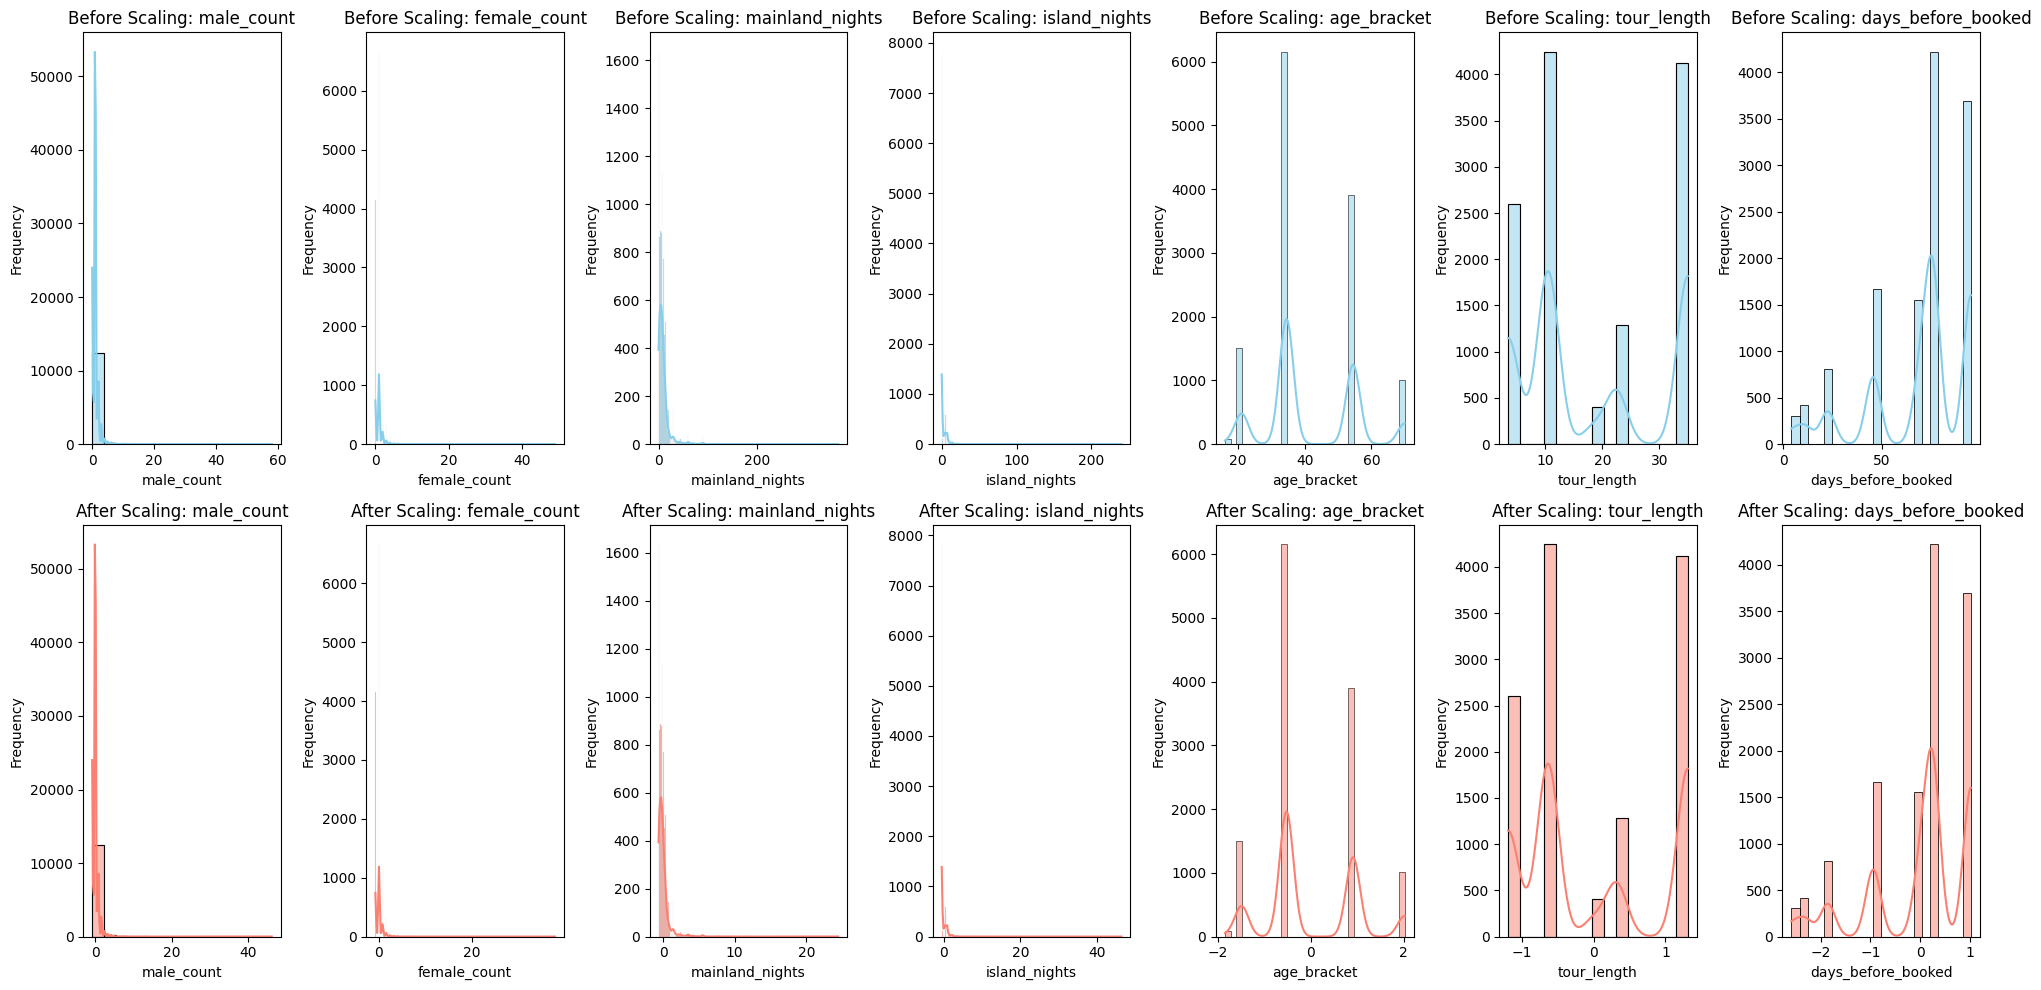

In [3345]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Features to scale
columns_to_scale = ['male_count', 'female_count', 'mainland_nights', 'island_nights', 'age_bracket', 'tour_length', 'days_before_booked']

# Create subplots for before and after scaling
fig, axes = plt.subplots(2, len(columns_to_scale), figsize=(20, 10))

# Plot histograms before scaling
for i, col in enumerate(columns_to_scale):
    sns.histplot(train_df[col], kde=True, ax=axes[0, i], color='skyblue')
    axes[0, i].set_title(f'Before Scaling: {col}')
    axes[0, i].set_xlabel(f'{col}')
    axes[0, i].set_ylabel('Frequency')

# Apply scaling
train_df[columns_to_scale] = scaler.fit_transform(train_df[columns_to_scale])
test_df[columns_to_scale] = scaler.transform(test_df[columns_to_scale])

# Plot histograms after scaling
for i, col in enumerate(columns_to_scale):
    sns.histplot(train_df[col], kde=True, ax=axes[1, i], color='salmon')
    axes[1, i].set_title(f'After Scaling: {col}')
    axes[1, i].set_xlabel(f'{col}')
    axes[1, i].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()


In [3346]:
from sklearn.model_selection import train_test_split

# Assuming 'category' is the target column and all other columns are features
X = train_df.drop(columns=['category'])  # Features
y = train_df['category']  # Target

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the distribution in the splits
print("Distribution in train set:\n", y_train.value_counts())
print("\nDistribution in validation set:\n", y_val.value_counts())


Distribution in train set:
 category
0.0    5023
1.0    3929
2.0    1171
Name: count, dtype: int64

Distribution in validation set:
 category
0.0    1256
1.0     982
2.0     293
Name: count, dtype: int64


In [3347]:
# from imblearn.over_sampling import SMOTE

# # Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# # Now X_train_res and y_train_res contain balanced data


In [3358]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import f1_score

# # List of random states to try
# random_states = [86, 46, 79, 54, 42]  # Example random states
# best_f1_score = 0
# best_random_state = None
# # Loop over different random states
# for state in random_states:
#     rf_model = RandomForestClassifier(random_state=state)
#     rf_model.fit(X_train, y_train)
#     y_pred = rf_model.predict(X_val)
#     # Calculate F1 score
#     f1 = f1_score(y_val, y_pred, average='weighted')  # You can use 'micro', 'macro', or 'weighted'
#     if f1 > best_f1_score:
#         best_f1_score = f1
#         best_random_state = state

# # Print the best random state and its corresponding F1 score
# print(f"Best Random State: {best_random_state}")
# print(f"Best F1 Score: {best_f1_score}")


# # Predict the probabilities for the test set
# test_probs = rf_model.predict_proba(test_df.drop(columns=['trip_ID']))  # Exclude 'trip_ID' for prediction

# # Get the class with the highest probability (for classification tasks)
# predicted_categories = test_probs.argmax(axis=1)

# # Prepare the submission DataFrame
# submission_df = pd.DataFrame({
#     'trip_ID': test_df['trip_ID'],  # Assuming test_df has the 'trip_ID' column
#     'category': predicted_categories
# })

# # Save to CSV
# submission_df.to_csv('submission_with_rf_ex.csv', index=False)
# print("Submission file 'submission_with_smote_and_f1.csv' created successfully.")

Best Random State: 86
Best F1 Score: 0.7580449697974194
Submission file 'submission_with_smote_and_f1.csv' created successfully.


In [3360]:
# import xgboost as xgb
# from sklearn.metrics import f1_score

# # List of random states to try
# random_states = [86, 46, 79, 54, 42]  # Example random states

# best_f1_score = 0
# best_random_state = None

# # Loop over different random states
# for state in random_states:
#     # Create an XGBoost model with the current random state
#     xgb_model = xgb.XGBClassifier(random_state=state)

#     # Train the model on the training data
#     xgb_model.fit(X_train, y_train)

#     # Make predictions on the validation set
#     y_pred = xgb_model.predict(X_val)

#     # Calculate F1 score
#     f1 = f1_score(y_val, y_pred, average='micro')  # You can use 'micro', 'macro', or 'weighted'

#     if f1 > best_f1_score:
#         best_f1_score = f1
#         best_random_state = state

# # Print the best random state and its corresponding F1 score
# print(f"Best Random State: {best_random_state}")
# print(f"Best F1 Score: {best_f1_score}")


Best Random State: 86
Best F1 Score: 0.6730469264995298


In [3106]:
# # Necessary imports
# from lightgbm import LGBMClassifier
# from sklearn.metrics import f1_score
# import pandas as pd


# # Replace special characters in column names
# X_train.columns = X_train.columns.str.replace(r"[^\w\s]", "_", regex=True)
# X_val.columns = X_val.columns.str.replace(r"[^\w\s]", "_", regex=True)
# test_df.columns = test_df.columns.str.replace(r"[^\w\s]", "_", regex=True)

# # Initialize the LightGBM model
# lgbm_model = LGBMClassifier(random_state=42)

# # Train the model on the training data
# lgbm_model.fit(X_train, y_train)

# # Make predictions on the validation set
# y_pred = lgbm_model.predict(X_val)

# # Calculate the F1 score
# f1 = f1_score(y_val, y_pred, average='weighted')
# print(f"F1 Score for LightGBM: {f1}")

# # Prepare the submission file for the test set
# test_probs = lgbm_model.predict_proba(test_df.drop(columns=['trip_ID']))  # Assuming 'trip_ID' column exists in test data
# predicted_categories = test_probs.argmax(axis=1)  # Get the class with the highest probability

# # Create the submission DataFrame
# submission_df = pd.DataFrame({
#     'trip_ID': test_df['trip_ID'],
#     'category': predicted_categories
# })

# # Save the submission file
# submission_filename = "submission_LGBM3.csv"
# submission_df.to_csv(submission_filename, index=False)
# print(f"Submission file 'submission_LGBM.csv' created successfully.")


In [3107]:
# # Describe only the categorical columns (object type)
# categorical_description = train_df.select_dtypes(include=['category']).describe(include='all')

# # Transpose to display vertically
# categorical_description_transposed = categorical_description.transpose()

# # Apply styling to make it look like a grid (Jupyter Notebooks display)
# categorical_description_transposed.style.set_table_styles([
#     {'selector': 'thead th', 'props': [('background-color', '#f2f2f2'), ('text-align', 'center')]},
#     {'selector': 'tbody td', 'props': [('text-align', 'center')]},
#     {'selector': 'tr:nth-child(odd)', 'props': [('background-color', '#f9f9f9')]},
#     {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#ffffff')]},
#     {'selector': 'table', 'props': [('width', '100%')]},  # Optional: to make the table width 100%
# ])

In [3108]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Columns: 155 entries, age_bracket to visitor_nation_nan
dtypes: float64(145), int64(10)
memory usage: 15.0 MB


In [3109]:
# # Necessary imports
# from xgboost import XGBClassifier
# from sklearn.metrics import f1_score
# import pandas as pd

# # Initialize the XGBoost model
# xgb_model = XGBClassifier(random_state=42)

# # Train the model on the training data
# xgb_model.fit(X_train, y_train)

# # Make predictions on the validation set
# y_pred = xgb_model.predict(X_val)

# # Calculate the F1 score
# f1 = f1_score(y_val, y_pred, average='weighted')
# print(f"F1 Score for XGBoost: {f1}")

# # Prepare the submission file for the test set
# test_probs = xgb_model.predict_proba(test_df.drop(columns=['trip_ID']))  # Assuming 'trip_ID' column exists in test data
# predicted_categories = test_probs.argmax(axis=1)  # Get the class with the highest probability

# # Create the submission DataFrame
# submission_df = pd.DataFrame({
#     'trip_ID': test_df['trip_ID'],
#     'category': predicted_categories
# })

# # Save the submission file
# submission_filename = "submission_XGBoost8.csv"
# submission_df.to_csv(submission_filename, index=False)
# print(f"Submission file 'submission_XGBoost.csv' created successfully.")


F1 Score for XGBoost: 0.7502925137633703
Submission file 'submission_XGBoost.csv' created successfully.


In [ ]:
# import pandas as pd
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier
# from sklearn.metrics import f1_score

# # Assuming X_train, X_val, y_train, and y_val are already prepared

# # Initialize the model
# xgb_model = XGBClassifier(random_state=42)

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [6, 7, 8],
#     'min_child_weight': [1, 3, 5],
#     'subsample': [0.8, 1.0],
#     'colsample_bytree': [0.8, 1.0]
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
#                            scoring='f1_weighted', cv=3, verbose=2)

# # Fit the grid search
# grid_search.fit(X_train, y_train)

# # Best parameters and best score
# print(f"Best Hyperparameters: {grid_search.best_params_}")
# print(f"Best F1 Score: {grid_search.best_score_}")

# # Use the best model from GridSearchCV
# best_model = grid_search.best_estimator_

# # Train the model on the full training data (X_train and y_train)
# best_model.fit(X_train, y_train)

# # Make predictions on the validation set
# y_pred = best_model.predict(X_val)

# # Calculate the F1 score
# f1 = f1_score(y_val, y_pred, average='weighted')
# print(f"F1 Score on Validation Set: {f1}")

# # Assuming the test dataset is available as `test_df`
# # Prepare the test dataset (excluding 'trip_ID' for prediction)
# X_test = test_df.drop(columns=['trip_ID'])

# # Make predictions on the test set
# test_predictions = best_model.predict(X_test)

# # Prepare the submission DataFrame
# submission_df = pd.DataFrame({
#     'trip_ID': test_df['trip_ID'],   # Ensure 'trip_ID' is in the test dataset
#     'category': test_predictions
# })

# # Save to CSV
# submission_df.to_csv('submission_xgboost_gridsearch.csv', index=False)

# print("Submission file 'submission_xgboost_gridsearch.csv' created successfully.")


In [3110]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score

# Assuming X_train, X_val, y_train, and y_val are already prepared

# Define the AdaBoost model with n_estimators
adaboost_model = AdaBoostClassifier(random_state=42, n_estimators=100)

# Train the AdaBoost model
adaboost_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = adaboost_model.predict(X_val)

# Calculate the F1 score on the validation set
f1 = f1_score(y_val, y_pred, average='weighted')
print(f"F1 Score on Validation Set: {f1}")

# Assuming the test dataset is available as `test_df`
# Prepare the test dataset (excluding 'trip_ID' for prediction)
X_test = test_df.drop(columns=['trip_ID'])

# Make predictions on the test set
test_predictions = adaboost_model.predict(X_test)

# Prepare the submission DataFrame
submission_df = pd.DataFrame({
    'trip_ID': test_df['trip_ID'],   # Ensure 'trip_ID' is in the test dataset
    'category': test_predictions
})

# Save to CSV
submission_df.to_csv('submission_adaboost_classifier.csv', index=False)

print("Submission file 'submission_adaboost_classifier.csv' created successfully.")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


F1 Score on Validation Set: 0.7480970276593544
Submission file 'submission_adaboost_classifier.csv' created successfully.


In [3112]:
import pandas as pd
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


# # Define individual models
# rf_model = RandomForestClassifier(random_state=42)
# xgb_model = XGBClassifier(random_state=42)
# lr_model = LogisticRegression(random_state=42,max_iter=200)
# gb_model = GradientBoostingClassifier(random_state=42)
# ab_model = AdaBoostClassifier(random_state=42)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
xgb_model = XGBClassifier(random_state=42, n_estimators=100)
lr_model = LogisticRegression(random_state=42, max_iter=200)
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100)
ab_model = AdaBoostClassifier(random_state=42, n_estimators=100)



# Combine models into a VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('lr', lr_model),
    ('gb', gb_model),
    ('ab', ab_model)
], voting='soft')

# Train the VotingClassifier on the full training data
voting_clf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = voting_clf.predict(X_val)

# Calculate the F1 score on validation data
f1 = f1_score(y_val, y_pred, average='weighted')
print(f"F1 Score on Validation Set: {f1}")

# Assuming the test dataset is available as `test_df`
# Prepare the test dataset (excluding 'trip_ID' for prediction)
X_test = test_df.drop(columns=['trip_ID'])

# Make predictions on the test set
test_predictions = voting_clf.predict(X_test)

# Prepare the submission DataFrame
submission_df = pd.DataFrame({
    'trip_ID': test_df['trip_ID'],   # Ensure 'trip_ID' is in the test dataset
    'category': test_predictions
})

# Save to CSV
submission_df.to_csv('submission_voting_classifier1.csv', index=False)

print("Submission file 'submission_voting_classifier.csv' created successfully.")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


F1 Score on Validation Set: 0.7536559901127985
Submission file 'submission_voting_classifier.csv' created successfully.


In [3115]:
import pandas as pd
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Assuming X_train, X_val, y_train, and y_val are already prepared

# Define base models with n_estimators for those models that support it
base_learners = [
    ('rf', RandomForestClassifier(random_state=42, n_estimators=100)),
    ('xgb', XGBClassifier(random_state=42, n_estimators=100)),
    ('gb', GradientBoostingClassifier(random_state=42, n_estimators=100)),
    ('ab', AdaBoostClassifier(algorithm='SAMME', random_state=42, n_estimators=100)),
    ('lgbm', LGBMClassifier(random_state=42, n_estimators=100))  # Add LGBMClassifier
]

# Define the meta-model (Logistic Regression in this case)
# meta_model = LogisticRegression(random_state=42)
meta_model = XGBClassifier(random_state=42, n_estimators=100)

# Create Stacking Classifier with the base learners and meta-model
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = stacking_clf.predict(X_val)

# Calculate the F1 score on the validation set
f1 = f1_score(y_val, y_pred, average='weighted')
print(f"F1 Score on Validation Set: {f1}")

# Assuming the test dataset is available as `test_df`
# Prepare the test dataset (excluding 'trip_ID' for prediction)
X_test = test_df.drop(columns=['trip_ID'])

# Make predictions on the test set
test_predictions = stacking_clf.predict(X_test)

# Prepare the submission DataFrame
submission_df = pd.DataFrame({
    'trip_ID': test_df['trip_ID'],   # Ensure 'trip_ID' is in the test dataset
    'category': test_predictions
})

# Save to CSV
submission_df.to_csv('submission_stacking_classifier2.csv', index=False)

print("Submission file 'submission_stacking_classifier.csv' created successfully.")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 319
[LightGBM] [Info] Number of data points in the train set: 10123, number of used features: 65
[LightGBM] [Info] Start training from score -0.700783
[LightGBM] [Info] Start training from score -0.946425
[LightGBM] [Info] Start training from score -2.156952
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 8098, num

In [2203]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np
# from scipy.stats import skew

# # Define a function to check the distribution and decide imputation strategy
# def check_and_impute(df, column):
#     # Plot Histogram and Boxplot
#     plt.figure(figsize=(12, 6))

#     # Histogram
#     plt.subplot(1, 2, 1)
#     sns.histplot(df[column], kde=True)
#     plt.title(f'{column} - Histogram')

#     # Boxplot
#     plt.subplot(1, 2, 2)
#     sns.boxplot(x=df[column])
#     plt.title(f'{column} - Boxplot')

#     plt.tight_layout()
#     plt.show()

#     # Check skewness to determine if data is skewed
#     column_skewness = skew(df[column].dropna())
#     print(f"Skewness of {column}: {column_skewness}")

#     # If the skewness is significant (greater than 0.5 or less than -0.5), it is skewed
#     if abs(column_skewness) > 0.5:
#         print(f"{column} is skewed. Using median to fill missing values.")
#         return df[column].fillna(df[column].median())
#     else:
#         print(f"{column} is not significantly skewed. Using mean to fill missing values.")
#         return df[column].fillna(df[column].mean())

# # Example: Apply this to your train_df or test_df
# train_df['female_count'] = check_and_impute(train_df, 'female_count')
# train_df['male_count'] = check_and_impute(train_df, 'male_count')

